# Desafio de programação 1: Regressão Linear

## Identificação:

**Nome:** Gabriel Francisco de Oliveira Castro

**Matrícula:** 202066571

## Introdução

Neste exercício, nós implementaremos a técnica de regressão linear e observaremos os seus resultados.

Todas as informações para resolver este problema estão contidas neste ambiente.

Antes de iniciarmos o exercício, nós precisamos que algumas bibliotecas já estejam disponíveis. São elas:

- Numpy: (http://www.numpy.org/) para todas as operações matriciais;
- Matplotlib: (https://matplotlib.org/) para a plotagem dos gráficos.

Mas antes, nós configuraremos o ambiente, permitindo o acesso ao seu Google Drive, de onde serão importados os datasets e as imagens do notebook, além de outros módulos adicionais.


A célula abaixo irá "montar" o drive dentro do Google Colaboratory, ou seja, conseguiremos acessar diretamente todos os conteúdos presentes no Google drive, possibilitando a execução do *Jupyter Notebook* a partir, unicamente, da nuvem.

Executar os Notebooks dessa forma gera uma série de vantagens, entre elas podemos citar:

- Portabilidade, uma vez que o notebook pode ser acessado de diferentes máquinas de forma remota.
- Segurança, já que, executando localmente, a máquina pode travar (a depender das configurações da máquina e da complexidade do modelo treinado) e o treinamento de um modelo pode ser perdido;
- Disponibilidade de uma GPU (*Graphics Processing Unit*) de boa qualidade, aumentando o desempenho na execução dos códigos;
- Emprego de um *cluster* com infra-estrutura confiável, garantindo mais segurança e facilidade na execução das tarefas;
- Utilização de bibliotecas essenciais sem precisar instalá-las na máquina, evitando o preenchimento de memória do computador utilizado;
- Por fim, possibilidade de várias pessoas editarem o código do Notebook simultaneamente, colaborando entre si de forma online.


In [ ]:
#allows the drive to be accessed
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Com o acesso permitido ao drive e com o ambiente preparado, podemos iniciar a importação das bibliotecas de Python que serão utilizadas no nosso código.

In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

<a id="section1"></a>
## 1 Função simples de python e numpy

A primeira parte será para familiarização com o ambiente. Na próxima célula, faça uma função que gere uma matriz identidade 5x5, utilizando a linha:

```python
A = np.eye(5)
```
<a id="warmUpExercise"></a>

In [ ]:
def warmUpExercise():

    # ======== YOUR CODE HERE ======
    A = np.identity(5)   # modify this line

    # ==============================
    return A


Na última célula, nós definimos a função `warmUpExercise` que agora poderá ser executada. O seu resultado deve ser igual a:

```python
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```

In [ ]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Regressão Linear de uma variável

Agora nós iremos implementar a regressão linear para uma variável para tentar prever os lucros de um food truck. Suponha que você é o CEO de uma franquia de food trucks e está considerando diferentes cidades para abrir uma nova filial. A franquia já possui outros trucks em várias cidades e você possui os dados de rentabilidade de cada um deles, além da população de cada um desses municípios. Você planeja utilizar esses dados para escolher qual será a cidade escolhida para abrir o próximo truck.

O documento `Data/ex1data1.txt` contém um dataset para o nosso problema de regressão. A primeira coluna é a população da cidade (em 10 mil habitantes) e a segunda coluna é o lucro do food truck nesta cidade (em 10 mil dólares). Um valor negativo para o lucro significa um prejuízo.

Nós já fornecemos o código para carregar esses dados. O dataset será carregado e guardado nas variáveis `X` e `y`:

In [ ]:
# Read comma separated data
data = np.loadtxt(os.path.join('/content/drive/MyDrive/UnB/Tópicos em Engenharia (IA e ML p  sist. de comunicações)/Desafio de programacao 1/Utilidades-TP1/Data/ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]


m = y.size  # Número de exemplos

### 2.1 Plotando os dados

Antes de iniciarmos qualquer tarefa, é interessante que nós visualizemos os dados. Para este dataset, nós podemos usar um gráfico de dispersão (scatter plot) para visualizar os dados, já que possuímos apenas uma feature (população).

Neste curso, nós usaremos apenas o `matplotlib` para as plotagens. O `pyplot` é um módulo desta biblioteca que disponibiliza uma interface simplificada para as plotagens mais usadas do `matplotlib`, imitando a interface de plotagem do MATLAB.

Na próxima etapa, a primeira tarefa será completar a função `plotData` a seguir. Modifique-a e preencha-a com o seguinte código:

```python
    pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
```

In [ ]:
def plotData(X, y):

    fig = pyplot.figure()  # open a new figure --> Litaralmente abre uma imagem

    # ====================== YOUR CODE HERE =======================
    pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Lucro em $10.000')
    pyplot.xlabel('População das cidades 10.000')
    # =============================================================



Agora vamos rodar a função com os dados carregados para visualizá-los. O resultado final deve ser igual a figura seguinte:

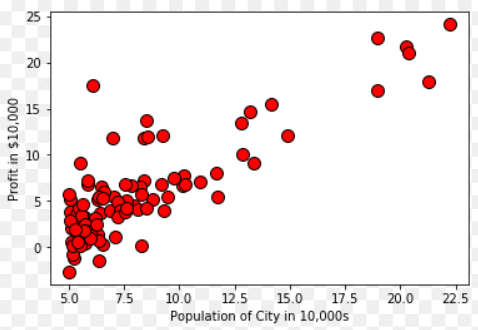

Execute a próxima célula para visualizar os dados


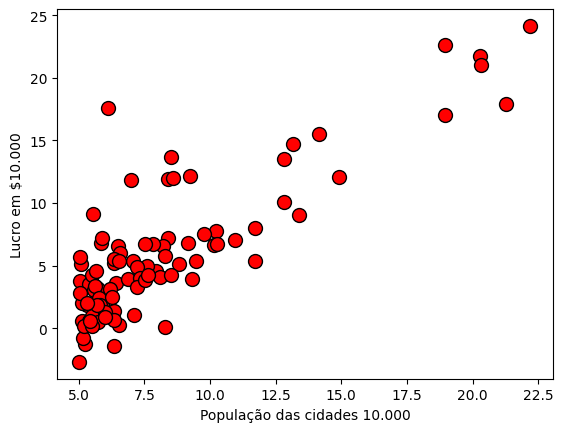

In [ ]:
plotData(X, y)

Para aprender mais sobre a função plot da biblioteca `matplotlib` e quais argumentos podem ser inseridos nela, nós podemos digitar `?pyplot.plot` em uma célula do jupyter notebook. Isso abrirá uma página separada mostrando a documentação da função.

Para selecionar os marcadores como círculos vermelhos, nós utilizamos a opção `'ro'` na função `plot`.

In [ ]:
?pyplot.plot

### 2.2 Gradient Descent

Nesta parte, nós iremos ajustar os parâmetros $\theta$ da regressão linear do nosso dataset utilizando a técnica denominada *gradient descent*.

Todas as variáveis utilizadas nas equações deste Desafio de Programação obedecem ao mesmo padrão usado na seção 1 e 2 da Fonte 1 do nosso curso ("[Machine Learning](https://www.coursera.org/learn/machine-learning?action=enroll&authMode=signup)", disponível através da plataforma Coursera).

#### 2.2.1 Atualização das equações

O objetivo da regressão linear é minimizar a função de custo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

em que a hipótese $h_\theta(x)$ é dada pelo modelo linear

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Repare que os parâmetros do nosso modelo são os valores de $\theta_j$. Esses valores devem ser ajustados para minimizar a função de custo $J(\theta)$. Uma forma de fazer isso é usar o método *gradient descent* em *batches* de dados. Nesta técnica, cada iteração realiza uma atualização

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{atualização simultânea de } \theta_j \text{ para todo } j$$

A cada iteração do método, o parâmetro $\theta_j$ se aproxima dos valores ótimos, ou seja, aqueles nos quais a função de custo $J(\theta)$ será minimizada.

<div class="alert alert-block alert-warning">
**Nota de implementação:** Nós guardamos cada exemplo em uma linha da matriz $X$ em Python `numpy`. Para levar em conta o termo de interceptação ($\theta_0$), nós adicionaremos uma primeira coluna "extra" em $X$, em que todos elementos serão iguais a '1'. Isso permitirá tratar $\theta_0$ como outra simples feature.    
</div>


#### 2.2.2 Implementação

Nós já possuímos os dados para a regressão linear. Na próxima célula, nós adicionaremos outra dimensão aos nossos dados para acomodar o termo de interceptação $\theta_0$. NÃO execute essa célula mais de uma vez.

In [ ]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis.
# The first axis (axis=0) refers to rows (training examples)
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)
# Substitui todos os elementos da coluna referente a população por 1's

<a id="section2"></a>
#### 2.2.3 Cálculo do custo $J(\theta)$

Quando utilizamos o método *gradient descent* para minimizar a função de custo $J(\theta)$, é interessante monitorar a sua convergência, isto é, o valor do custo ao longo das iterações. Nesta seção, nós implementaremos a função que calcula $J(\theta)$, permitindo o acompanhamento da convergência da nossa implementação.

A próxima tarefa é completar o código da função `computeCost`, que calcula $J(\theta)$. Lembre que $X$ e $y$ não são valores escalares. $X$ é uma matriz (e por isso é representado em letra maiúscula) cujas linhas representam exemplos do dados de treinamento (*training set*) e $y$ é um vetor (e por isso é representado em letra minúscula) em que cada elemento representa a saída desejada para cada um dos exemplos de treinamento de $X$.
<a id="computeCost"></a>

A correta implementação desta função lhe agregará **40 pontos** dentro da pontuação total deste Desafio de Programação.

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$


In [ ]:
def computeCost(X, y, theta):
    # Variáveis auxiliares
    J = 0
    sum = 0

    # Multiplica as matrizes p/ achar a hipótese (h)
    h = X @ theta

    # Acha a função de custo (Média dos Erros Quadráticos)
    sum = np.sum(np.square(h - y))
    J = (1/(2*m)) * sum

    return J

Uma vez que a função esteja completa, o próximo passo é rodar `computeCost` duas vezes utilizando duas diferentes inicializações de $\theta$. Você terá o custo printado na sua tela.

In [ ]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Com theta = [0, 0] \nCusto calculado = %.2f' % J)
print('Valor de custo esperado (aproximado) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Com theta = [-1, 2]\nCusto calculado = %.2f' % J)
print('Valor de custo esperado (aproximado) 54.24\n')



Com theta = [0, 0] 
Custo calculado = 32.07
Valor de custo esperado (aproximado) 32.07

Com theta = [-1, 2]
Custo calculado = 54.24
Valor de custo esperado (aproximado) 54.24



Uma observação interessante é que o `\n` é uma quebra de linha, ou seja, de maneira prática pula uma linha.

<a id="section3"></a>
#### 2.2.4 Gradient Descent

A seguir, nós completaremos a função que implementa o gradient descent. A estrutura do loop já foi escrita para você. O que ainda deve ser feito é fornecer as atualização de $\theta$ em cada iteração.

Enquanto você programa, certifique-se de que está entendendo o que está sendo otimizado e o que você está fazendo para isto. Tenha em mente que o custo $J(\theta)$ é parametrizado pelo vetor $\theta$, e não por $X$ e $y$. Isto é, nós minimizaremos o valor de $J(\theta)$ através das mudanças nos valores de $\theta$, e não pelas mudanças nos valores de $X$ ou $y$.

Retorne às equações deste notebook e aos vídeos se você ainda está inseguro. Uma boa maneira de verificar se o método *gradient descent* está funcionando corretamente é monitorar o valor de $J(\theta)$ e checar se ele decresce a cada iteração.

O início da função `gradientDescent` chama `computeCost` em cada iteração e salva o custo em uma lista `python`. Assumindo que nós implementamos estas duas funções corretamente, o valor para $J(\theta)$ não deve aumentar nunca, convergindo para um valor fixo ao final do algoritmo.

A correta implementação desta função lhe agregará **60 pontos** dentro da pontuação total deste Desafio de Programação.

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):

    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    dim = theta.shape[0] #number of parameters
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()

    J_history = [] # Use a python list to save cost in every iteration

    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        h = X @ theta
        erro = h - y
        theta = theta - (alpha / m) * (X.T @ erro)
        # =====================================================================

        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Depois de finalizar, nós chamaremos a função implementada `gradientDescent` e vamos printar o $\theta$ calculado. Nós inicializaremos os parâmetros $\theta$ como 0 e a taxa de aprendizado (learning rate) $\alpha$ como 0,01. Execute a próxima célula para conferir o código.

In [ ]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrado com o gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Valores esperados de theta (aproximado): [-3.6303, 1.1664]')

Theta encontrado com o gradient descent: -3.6303, 1.1664
Valores esperados de theta (aproximado): [-3.6303, 1.1664]


Nós utilizaremos os parâmetros obtidos como saída da função `gradientDescent` para plotar a regressão linear. Os resultados devem ser parecidos com a figura seguinte.

![]( https://docs.google.com/uc?export=download&id=1DaFT3koiByeXCuiExUBogRk4wJ9lnbw-)

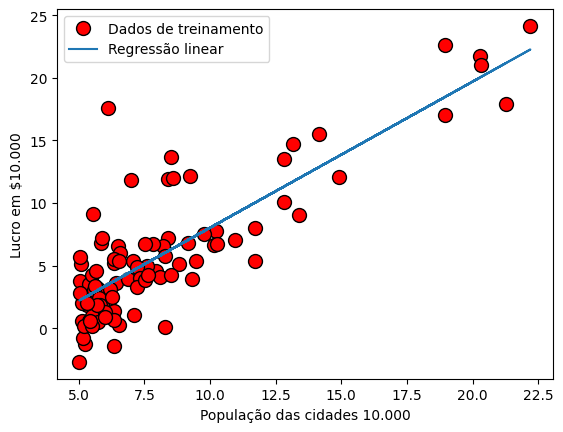

In [ ]:
# plot the linear fit
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Dados de treinamento', 'Regressão linear'])

Nossos valores finais de $\theta$ também serão usados para fazer previsões dos lucros em áreas de 35 e 70 mil habitantes.

<div class="alert alert-block alert-success">
Note que as linhas de código seguintes utilizam produto entre matrizes, ao invés de somas em loops, para calcular as previsões. Isto é um exemplo de vetorização de código em `numpy`.
</div>

<div class="alert alert-block alert-success">
Note que o primeiro argumento da função `np.dot` é uma lista python. A biblioteca `numpy` pode converter internamente listas python em `numpy arrays` quando explicitado nos argumentos das funções `numpy`.
</div>


In [ ]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para população = 35,000, nós prevemos um lucro de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('Para população = 70,000, nós prevemos um lucro de {:.2f}\n'.format(predict2*10000))

Para população = 35,000, nós prevemos um lucro de 4519.77

Para população = 70,000, nós prevemos um lucro de 45342.45



### 2.4 Visualizando $J(\theta)$

Para entender melhor a função de custo $J(\theta)$, nós iremos agora plotar o custo através de um gráfico tridimensional, com o custo no eixo z em função de $\theta_0$ e $\theta_1$. Você não precisará escrever nada de novo nesta parte, mas deve entender o código que já foi escrito para criar as imagens.

Na próxima célula, o código está construído para calcular $J(\theta)$ utilizando a função `computeCost` que você escreveu. Depois de executar a próxima célula, você terá uma matriz 2-D com os valores de $J(\theta)$. Então, esses valores serão usados para produzir a superfície e o contorno de $J(\theta)$ que serão plotados usando as funções `plot_surface` e `contourf` do matplotlib. Essas plotagens devem se parecer com as imagens a seguir.

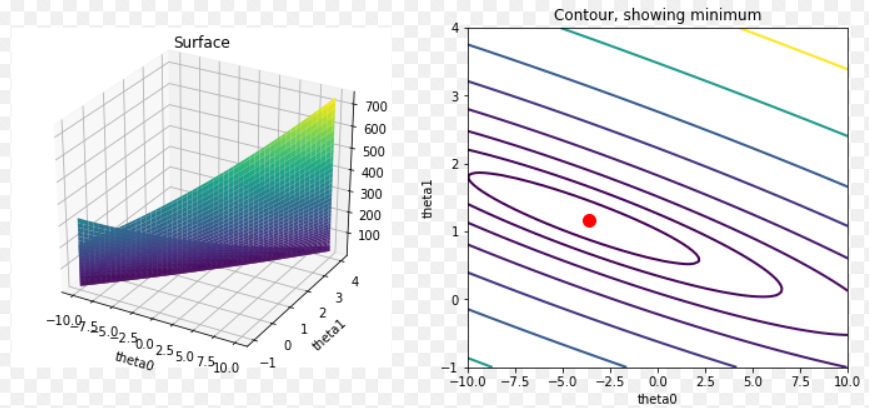

O propósito desses gráficos é mostrar como $J(\theta)$ varia com as mudanças de $\theta_0$ e $\theta_1$. A função de custo $J(\theta)$ possui um mínimo global. Isto é mais fácil de ser visualizado no gráfico de contorno do que no gráfico 3-D. Este mínimo é o ponto ótimo para $\theta_0$ e $\theta_1$, e cada iteração do método *gradient descent* move os parâmetros para mais próximo deste ponto.

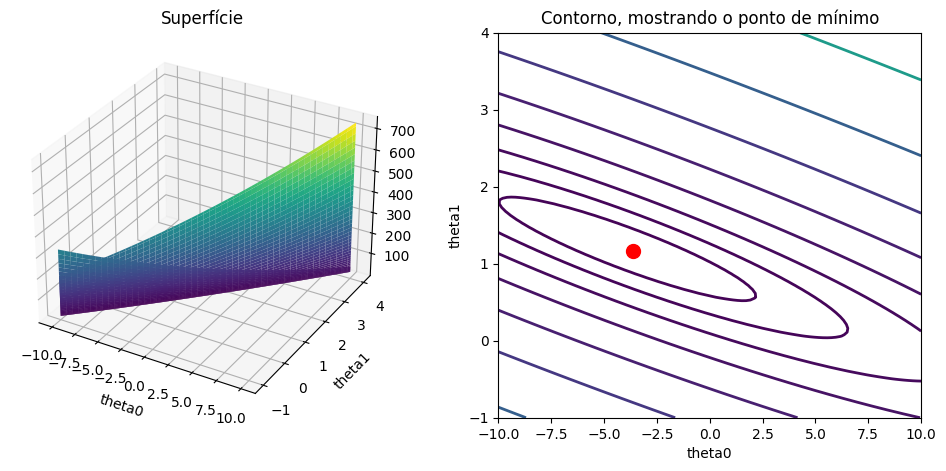

In [ ]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Superfície')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando o ponto de mínimo')
pass

Por fim, é interessante observar a evolução da função de custo obtida ao longo das iterações do algoritmo.

Sendo assim, complete o código da função `plot_J_history`, que plota um gráfico de linha, em que o eixo x são as iterações do algoritmo e o eixo y são os valores de $J$ obtidos ao longo das iterações.

In [ ]:
def plot_J_history(J_history):

    # Criando o Eixo x
    num_de_Iteracoes = []
    tam = len(J_history)

    for i in range(tam):
        num_de_Iteracoes.append(i)

    fig = pyplot.figure()  # open a new figure

    # ====================== YOUR CODE HERE =======================
    pyplot.plot(num_de_Iteracoes,J_history)
    pyplot.xlabel('Número de iterações')
    pyplot.ylabel('Valores da F. Custo (J)')
    # =============================================================


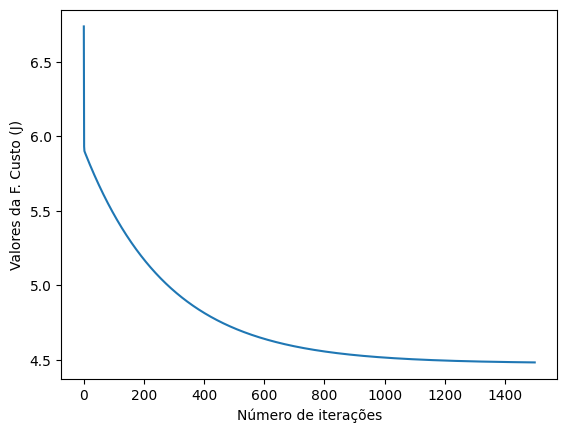

In [ ]:
plot_J_history(J_history)

Observe como a função de custo converge para valores menores do que os iniciais, indicando a evolução do ajuste da regressão ao longo das iterações do algoritmo.